<a href="https://colab.research.google.com/github/arthireddyannad/Data-Analytics/blob/main/AZ_Round_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of New York City Restaurant Inspection Data**
The Health Department inspects about 29,000 restaurants a year to monitor compliance with City and State food safety
regulations. Since July 2010, the Health Department has required restaurants to post letter grades showing sanitary inspection
results. Restaurants with a score between 0 and 13 points earn an A, those with 14 to 27 points receive a B and those with 28
or more a C. Inspection results are posted on the Health Department’s website

**PROJECT OVERVIEW** : To derive key insights and patterns from the data by employing Machine Learning and Visualizations.

**STEP 1:** Importing the necessary libraries for our analysis

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC




from sklearn.metrics import confusion_matrix, classification_report

**STEP 2:** Read CSV Datafile

In [2]:
from os import listdir
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/NY_Restaurant_Inspection_Results.csv'
path2='/content/drive/My Drive/Colab Notebooks/RestaurantInspectionDataDictionary_09242018.xlsx'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def read_file(filename):
      "Read the contents of FILENAME and return as a string."
      infile = open(filename) # windows users should use codecs.open after importing codecs
      contents = infile.read()
      infile.close()
      return contents

In [4]:
# google colab version
def read_file(path):
  with open(path, "r") as f:
      content = f.read()
      f.close()
      return content

In [5]:
df=pd.read_csv(path)

1. **Data Exploration and Preprocessing:**



o Perform an initial exploration to understand the structure and features.  
o Handle any missing values, outliers, or inconsistencies in the data.  
o Perform feature engineering if necessary (e.g., creating new features, encoding  categorical variables).


**STEP 3:** Viewing the data

In [6]:
df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50151727,RED PARROT,Queens,917,CLINTONVILLE ST,11357.0,9178542414,NaN,1/1/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,9/5/2024,NaN,40.793464,-73.813150,407.0,19.0,98700.0,4102818.0,4.045260e+09,QN49,NaN
1,50157212,NaN,Manhattan,154,WEST 29 STREET,10001.0,2125336888,NaN,1/1/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,9/5/2024,NaN,40.747287,-73.991595,105.0,3.0,9500.0,1015132.0,1.008040e+09,MN17,NaN
2,40424337,BAGEL WORKS,Manhattan,1229,FIRST AVENUE,10065.0,2127446444,Bagels/Pretzels,8/12/2021,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,21.0,NaN,NaN,9/5/2024,Cycle Inspection / Initial Inspection,40.764229,-73.958616,108.0,5.0,11800.0,1044742.0,1.014410e+09,MN31,NaN
3,50148853,DON FRAN CAFE LLC,0,NaN,NaN,NaN,9342108069,NaN,1/1/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,9/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50071292,GOLDEN KRUST CARIBBEAN BAKERY & GRILL,Queens,23004,MERRICK BLVD,11413.0,7187232800,Caribbean,1/26/2024,Violations were cited in the following area(s).,04K,Evidence of rats or live rats in establishment...,Critical,18.0,NaN,NaN,9/5/2024,Cycle Inspection / Initial Inspection,40.676049,-73.740298,413.0,31.0,63200.0,4282608.0,4.131570e+09,QN66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246331,41070633,APPLEBEE'S,Queens,90-15,QUEENS BOULEVARD,11373.0,7182717999,American,11/1/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,9.0,A,11/1/2023,9/5/2024,Cycle Inspection / Initial Inspection,40.733840,-73.871577,404.0,25.0,68300.0,4045999.0,4.018600e+09,QN29,NaN
246332,50059584,CARMINE STREET BEER,Manhattan,52,CARMINE STREET,10014.0,2126332337,Bottled Beverages,6/23/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,12.0,A,6/23/2023,9/5/2024,Cycle Inspection / Initial Inspection,40.729951,-74.003604,102.0,3.0,6700.0,1008356.0,1.005270e+09,MN23,NaN
246333,41565686,THE LUTHERAN HALAL CAFE,Brooklyn,5121,2 AVENUE,11232.0,7185678244,Sandwiches,8/25/2021,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,3.0,A,8/25/2021,9/5/2024,Cycle Inspection / Initial Inspection,40.648356,-74.017672,307.0,38.0,2000.0,3013461.0,3.007970e+09,BK32,NaN
246334,50063050,PRESSED JUICERY,Manhattan,7,EAST 14 STREET,10003.0,6466570841,"Juice, Smoothies, Fruit Salads",1/9/2024,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,8.0,A,1/9/2024,9/5/2024,Cycle Inspection / Initial Inspection,40.735852,-73.993245,105.0,2.0,5200.0,1016062.0,1.008420e+09,MN13,NaN


**STEP 4:** Understanding the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246336 entries, 0 to 246335
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  246336 non-null  int64  
 1   DBA                    245619 non-null  object 
 2   BORO                   246336 non-null  object 
 3   BUILDING               245927 non-null  object 
 4   STREET                 246322 non-null  object 
 5   ZIPCODE                243466 non-null  float64
 6   PHONE                  246333 non-null  object 
 7   CUISINE DESCRIPTION    243765 non-null  object 
 8   INSPECTION DATE        246336 non-null  object 
 9   ACTION                 243765 non-null  object 
 10  VIOLATION CODE         242399 non-null  object 
 11  VIOLATION DESCRIPTION  242399 non-null  object 
 12  CRITICAL FLAG          246336 non-null  object 
 13  SCORE                  234422 non-null  float64
 14  GRADE                  120289 non-nu

**Thoughts after viewing the data **                                                                         

*   Data has all the restaurants in rows with their respective inspection date and violation code, total score of the inspection is displayed next to each violation code followed by other relevant fields
*   Location Point1 has 0 NON NULL values and can be eliminated.
*  We have a lot of geographical attributes and categorical variables that may not be required for analysis which include **PINCODE, Latitude, Longitude, BIN, BBL, NTA, Community Board and Census Tract, Building, Street, Phone.**




*   Grade & Grade date seems to have a lot of missing values






# **DATA DICTIONARY**

In [8]:
# google colab version
def read_file(path2):
  with open(path2, "r") as f:
        content2 = f.read()
        f.close()
        return content2

In [9]:

data_dictionary = pd.read_excel(path2, sheet_name='Column Info', header=1)
data_dictionary

,Column Name,Column Description,"Term, Acronym, or Code Definitions","Additional Notes \n(where applicable, include the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and information on column source)"
0,NaN,NaN,NaN,NaN
1,CAMIS,Unique identifier for the establishment (resta...,NaN,"10-digit integer, static per restaurant permit"
2,DBA,Establishment (restaurant) name,DBA= Doing Business As,"Public business name, may change at discretion..."
3,BORO,Borough of establishment (restaurant) location,• 1 = MANHATTAN\n• 2 = BRONX\n• 3 = BROOKLYN\n...,NOTE: There may be discrepancies between zip c...
4,BUILDING,Building number for establishment (restaurant)...,NaN,NaN
5,STREET,Street name for establishment (restaurant) loc...,NaN,NaN
6,ZIPCODE,Zip code of establishment (restaurant) location,NaN,NaN
7,PHONE,Phone number,NaN,Phone number provided by restaurant owner/manager
8,CUISINE DESCRIPTION,Establishment (restaurant) cuisine,NaN,Optional field provided by provided by restaur...
9,INSPECTION DATE,NaN,NaN,NOTE: Inspection dates of 1/1/1900 mean an est...


***Notes from Data Dictionary:***


--> There are data discrepancies betweeen ZIP code and BORO listed due to differences in establishment listed location vs physical location.

-->CAMIS and DBA are same fields restaurant ID and description, DBA description might change


   


*   Inspection date : 1/1/1900

*   Action: Missing

means an establishment has not yet had an inspection.



-->Grade date, Record Date and Inspection date are the date columns in the dataset.

# **EXPLORING THE DATA**

In [10]:
df.shape #rows and columns(quick peak at the shape of our data)

(246336, 27)

In [11]:
df.nunique() #columns and their unique values


,0
CAMIS,29094
DBA,22579
BORO,6
BUILDING,7594
STREET,2404
ZIPCODE,227
PHONE,26168
CUISINE DESCRIPTION,89
INSPECTION DATE,1746
ACTION,5


**Listing categorical columns**

In [12]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['DBA', 'BORO', 'BUILDING', 'STREET', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'NTA']


# **DATA PRE-PROCESSING**

**Dropping columns:**

Dropping columns that are not required for our analysis.


Dropping building, street, phone, code, latitude, longitude, record date, location point1, council district, census tract, BIN, BBL, NTA, community board which I assume are not required for focused analysis.


In [13]:
df = df.drop(['BUILDING', 'STREET', 'PHONE','GRADE DATE', 'RECORD DATE', 'Location Point1', 'Latitude', 'Longitude', 'ZIPCODE'], axis=1)

**Renaming columns**

In [14]:
df = df.rename(columns={'DBA': 'Restaurant', 'BORO': 'Borough'}) #renaming DBA (Doing business as) to restaurant and BORO to Borough

SORTING & GROUPING ROWS

Restaurants are currently displayed in each row against their inspection date and violation codes and their total score for that inspection in the below format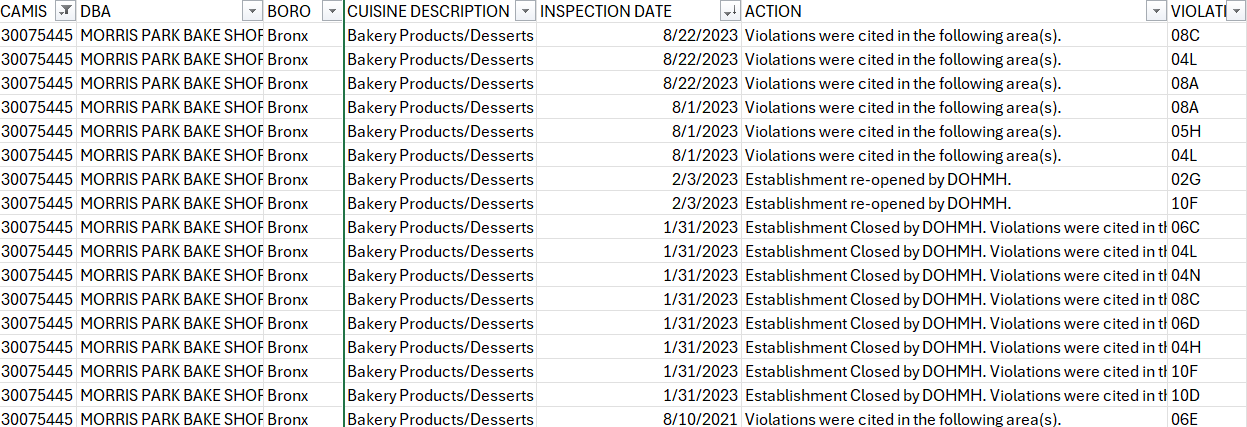


---



In [27]:
# Count of violations for each restaurant
df['VIOLATION_COUNT'] = df.groupby(['CAMIS', 'INSPECTION DATE'])['VIOLATION CODE'].transform('count')

# Inspection frequency for each restaurant
#df['INSPECTION_FREQUENCY'] = df.groupby('CAMIS')['INSPECTION DATE'].transform('count')

# Critical flag frequency during each inspection
df['CRITICAL_FLAG_COUNT'] = df.groupby(['CAMIS', 'INSPECTION DATE'])['CRITICAL FLAG'].transform('count')

In [28]:
data=df

In [29]:
df_sorted = data.sort_values(by=['CAMIS', 'INSPECTION DATE'], ascending=[True, False])

In [30]:
df_sorted[:17]

,CAMIS,Restaurant,Borough,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE,Community Board,Council District,Census Tract,BIN,BBL,NTA,VIOLATION_COUNT,INSPECTION_FREQUENCY,CRITICAL_FLAG_COUNT
44953,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,8/22/2023,Violations were cited in the following area(s).,08C,Pesticide not properly labeled or used by unli...,Not Critical,12.0,A,Cycle Inspection / Re-inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,3,17,3
135691,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,8/22/2023,Violations were cited in the following area(s).,04L,Evidence of mice or live mice in establishment...,Critical,12.0,A,Cycle Inspection / Re-inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,3,17,3
233603,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,8/22/2023,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,12.0,A,Cycle Inspection / Re-inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,3,17,3
177197,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,8/10/2021,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,5.0,A,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,1,17,1
16793,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,8/1/2023,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,38.0,NaN,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,3,17,3
67404,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,8/1/2023,Violations were cited in the following area(s).,05H,No approved written standard operating procedu...,Critical,38.0,NaN,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,3,17,3
166498,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,8/1/2023,Violations were cited in the following area(s).,04L,Evidence of mice or live mice in establishment...,Critical,38.0,NaN,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,3,17,3
53080,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,2/3/2023,Establishment re-opened by DOHMH.,02G,Cold TCS food item held above 41 °F; smoked or...,Critical,13.0,P,Cycle Inspection / Reopening Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,2,17,2
162265,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,2/3/2023,Establishment re-opened by DOHMH.,10F,Non-food contact surface or equipment made of ...,Not Critical,13.0,P,Cycle Inspection / Reopening Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,2,17,2
52517,30075445,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,1/31/2023,Establishment Closed by DOHMH. Violations were...,06C,"Food, supplies, and equipment not protected fr...",Critical,21.0,NaN,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,8,17,8


In [31]:
df=df.groupby(['CAMIS', 'INSPECTION DATE']).first().reset_index()

In [32]:
df['inspection_date'] = pd.to_datetime(df['INSPECTION DATE']) # Use the actual column name 'INSPECTION DATE'
df = df.sort_values(by=['CAMIS', 'inspection_date'])

# Group by CAMIS and calculate time to next inspection
df['next_inspection'] = df.groupby('CAMIS')['inspection_date'].shift(-1)
df['time_to_next_inspection'] = (df['next_inspection'] - df['inspection_date']).dt.days

# Define target variable: if next inspection is within 6 months (182 days)
df['target'] = df['time_to_next_inspection'].apply(lambda x: 1 if 0< x <= 182 else 0)
# Drop rows where 'next_inspection' is NaT (last inspections in a series)
# df = df.dropna(subset=['next_inspection'])

In [33]:
df[:17]

,CAMIS,INSPECTION DATE,Restaurant,Borough,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE,Community Board,Council District,Census Tract,BIN,BBL,NTA,VIOLATION_COUNT,INSPECTION_FREQUENCY,CRITICAL_FLAG_COUNT,inspection_date,next_inspection,time_to_next_inspection,target
3,30075445,8/10/2021,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,5.0,A,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,1,17,1,2021-08-10,2023-01-31,539.0,0
0,30075445,1/31/2023,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,Establishment Closed by DOHMH. Violations were...,06C,"Food, supplies, and equipment not protected fr...",Critical,21.0,None,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,8,17,8,2023-01-31,2023-02-03,3.0,1
1,30075445,2/3/2023,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,Establishment re-opened by DOHMH.,02G,Cold TCS food item held above 41 °F; smoked or...,Critical,13.0,P,Cycle Inspection / Reopening Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,2,17,2,2023-02-03,2023-08-01,179.0,1
2,30075445,8/1/2023,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,38.0,None,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,3,17,3,2023-08-01,2023-08-22,21.0,1
4,30075445,8/22/2023,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,Violations were cited in the following area(s).,08C,Pesticide not properly labeled or used by unli...,Not Critical,12.0,A,Cycle Inspection / Re-inspection,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,3,17,3,2023-08-22,NaT,NaN,0
6,30112340,7/13/2022,WENDY'S,Brooklyn,Hamburgers,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,11.0,A,Cycle Inspection / Initial Inspection,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60,3,14,3,2022-07-13,2023-07-21,373.0,0
7,30112340,7/21/2023,WENDY'S,Brooklyn,Hamburgers,Violations were cited in the following area(s).,10B,Anti-siphonage or back-flow prevention device ...,Not Critical,9.0,A,Cycle Inspection / Initial Inspection,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60,2,14,2,2023-07-21,2024-07-12,357.0,0
5,30112340,7/12/2024,WENDY'S,Brooklyn,Hamburgers,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage associated w...,Critical,27.0,None,Cycle Inspection / Initial Inspection,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60,5,14,5,2024-07-12,2024-08-07,26.0,1
8,30112340,8/7/2024,WENDY'S,Brooklyn,Hamburgers,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,19.0,Z,Cycle Inspection / Re-inspection,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60,4,14,4,2024-08-07,NaT,NaN,0
9,30191841,1/4/2022,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,Irish,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,A,Cycle Inspection / Initial Inspection,104.0,3.0,13900.0,1026048.0,1.010480e+09,MN15,3,5,3,2022-01-04,2023-04-23,474.0,0


**Dropping rows with missing values**

In [34]:
# Dropping rows with missing values in ACTION, INSPECTION DATE and CRITICAL FLAG
df = df[~((df['ACTION'] == 'Missing') | (df['INSPECTION DATE'] == '1/1/1900'))]

missing values in grade and grade date are likely due to restuarants scoring 14+ points during their initial inspection and are not graded until their re-inspection.

In [35]:
# Dropping rows where both grade and score are null
df = df.dropna(subset=['GRADE', 'SCORE'], how='all')
df['Community Board'].fillna('NA', inplace=True)
df['Council District'].fillna('NA', inplace=True)
df['Census Tract'].fillna('NA', inplace=True)
df['BIN'].fillna('NA', inplace=True)
df['NTA'].fillna('NA', inplace=True)
df['BBL'].fillna('NA', inplace=True)


<ipython-input-35-4e2e1956e42b>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Community Board'].fillna('NA', inplace=True)
<ipython-input-35-4e2e1956e42b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Community Board'].fillna('NA', inplace=True)
<ipython-input-35-4e2e1956e42b>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Council District'].fillna('NA', inplace=True)
<ipython-input-35-4e2e1956e42b>:4: SettingWithCopyWarning: 
A value is trying to be set 

In [36]:
# Dropping rows where both grade and score are null
df = df.dropna(subset=['GRADE', 'SCORE'], how='all')


In [37]:
df.isnull().values.any()


True

In [38]:
df

,CAMIS,INSPECTION DATE,Restaurant,Borough,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE,Community Board,Council District,Census Tract,BIN,BBL,NTA,VIOLATION_COUNT,INSPECTION_FREQUENCY,CRITICAL_FLAG_COUNT,inspection_date,next_inspection,time_to_next_inspection,target
3,30075445,8/10/2021,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,5.0,A,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2041270037.0,BX37,1,17,1,2021-08-10,2023-01-31,539.0,0
0,30075445,1/31/2023,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,Establishment Closed by DOHMH. Violations were...,06C,"Food, supplies, and equipment not protected fr...",Critical,21.0,None,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2041270037.0,BX37,8,17,8,2023-01-31,2023-02-03,3.0,1
1,30075445,2/3/2023,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,Establishment re-opened by DOHMH.,02G,Cold TCS food item held above 41 °F; smoked or...,Critical,13.0,P,Cycle Inspection / Reopening Inspection,211.0,13.0,25200.0,2045445.0,2041270037.0,BX37,2,17,2,2023-02-03,2023-08-01,179.0,1
2,30075445,8/1/2023,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,38.0,None,Cycle Inspection / Initial Inspection,211.0,13.0,25200.0,2045445.0,2041270037.0,BX37,3,17,3,2023-08-01,2023-08-22,21.0,1
4,30075445,8/22/2023,MORRIS PARK BAKE SHOP,Bronx,Bakery Products/Desserts,Violations were cited in the following area(s).,08C,Pesticide not properly labeled or used by unli...,Not Critical,12.0,A,Cycle Inspection / Re-inspection,211.0,13.0,25200.0,2045445.0,2041270037.0,BX37,3,17,3,2023-08-22,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74090,50157604,9/3/2024,TAKE SUSHI & BOWL,Manhattan,Asian/Asian Fusion,Violations were cited in the following area(s).,19-07,Failure to maintain a sufficient supply of sin...,Not Critical,74.0,N,Administrative Miscellaneous / Initial Inspection,108.0,4.0,11000.0,1078347.0,1014150021.0,MN31,10,10,10,2024-09-03,NaT,NaN,0
74099,50157669,9/3/2024,RE LA GUN TANG,Brooklyn,Chinese,Violations were cited in the following area(s).,03B,"Shellfish not from approved source, not or imp...",Critical,72.0,N,Pre-permit (Operational) / Initial Inspection,307.0,43.0,10600.0,3014439.0,3008180041.0,BK34,12,12,12,2024-09-03,NaT,NaN,0
74102,50157674,8/27/2024,MAMIE'S YOGURT,Queens,Frozen Desserts,Violations were cited in the following area(s).,05H,No approved written standard operating procedu...,Critical,30.0,N,Pre-permit (Non-operational) / Initial Inspection,407.0,20.0,87100.0,4597144.0,4049727505.0,QN22,2,2,2,2024-08-27,NaT,NaN,0
74168,50158108,8/28/2024,QIAO XLB,Queens,Other,Violations were cited in the following area(s).,10G,Dishwashing and ware washing: Cleaning and san...,Not Critical,13.0,A,Pre-permit (Operational) / Initial Inspection,407.0,19.0,92500.0,4000000.0,4041640029.0,QN23,3,3,3,2024-08-28,NaT,NaN,0


**FILLING THE MISSING VALUES**

In [39]:
# Fill missing values in 'VIOLATION CODE' and 'VIOLATION DESCRIPTION' with 'NA'
df['VIOLATION CODE'].fillna('NA', inplace=True)
df['VIOLATION DESCRIPTION'].fillna('NA', inplace=True)


In [40]:
# Filling missing values in 'SCORE' with 0 where 'VIOLATION CODE' and 'VIOLATION DESCRIPTION' are 'NA'
df.loc[((df['VIOLATION CODE'] == 'NA') & (df['VIOLATION DESCRIPTION'] == 'NA')) & (df['SCORE'].isna()), 'SCORE'] = 0


In [41]:
# Fill missing values in 'GRADE' with 'NA' where 'VIOLATION CODE' and 'VIOLATION DESCRIPTION' are 'NA'
df.loc[((df['VIOLATION CODE'] == 'NA') & (df['VIOLATION DESCRIPTION'] == 'NA')) & (df['GRADE'].isna()), 'GRADE'] = 'NA'


In [42]:
#when score is zero and grade value is missing, replaced those missing values by NA
df.loc[(df['SCORE'] == 0) & (df['GRADE'].isna()), 'GRADE'] = 'NA'


In [43]:
#Filling the missing values in grade column with 'R' for the rows which have score not equals to zero
df.loc[df['SCORE'].notna() & df['GRADE'].isna(), 'GRADE'] = 'R'

In [44]:
df.isnull().values.any()

True

**Feature Engineering**

In [45]:
# Creating a new feature inspection year, inspection month from inspection date
df['INSPECTION YEAR'] = pd.to_datetime(df['INSPECTION DATE']).dt.year
df['INSPECTION MONTH'] = pd.to_datetime(df['INSPECTION DATE']).dt.month

from datetime import datetime
# Convert 'INSPECTION DATE' to datetime objects
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
#creating new feature DAYS SINCE LAST INSPECTION to identify when the last inspection has been done from the current date.
df['DAYS_ SINCE_LAST_INSPECTION'] = (datetime.today() - df['INSPECTION DATE']).dt.days
# Inspection frequency for each restaurant
df['INSPECTION_FREQUENCY'] = df.groupby('CAMIS')['INSPECTION DATE'].transform('count')


In [46]:
df['inspection_date'] = pd.to_datetime(df['INSPECTION DATE']) # Use the actual column name 'INSPECTION DATE'
df = df.sort_values(by=['CAMIS', 'inspection_date'])

# Group by CAMIS and calculate time to next inspection
df['next_inspection'] = df.groupby('CAMIS')['inspection_date'].shift(-1)
df['time_to_next_inspection'] = (df['next_inspection'] - df['inspection_date']).dt.days

# Define target variable: if next inspection is within 6 months (182 days)
df['target'] = df['time_to_next_inspection'].apply(lambda x: 1 if 0< x <= 182 else 0)
# Drop rows where 'next_inspection' is NaT (last inspections in a series)


In [47]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 CAMIS                              0
INSPECTION DATE                    0
Restaurant                         0
Borough                            0
CUISINE DESCRIPTION                0
ACTION                             0
VIOLATION CODE                     0
VIOLATION DESCRIPTION              0
CRITICAL FLAG                      0
SCORE                              1
GRADE                              0
INSPECTION TYPE                    0
Community Board                    0
Council District                   0
Census Tract                       0
BIN                                0
BBL                                0
NTA                                0
VIOLATION_COUNT                    0
INSPECTION_FREQUENCY               0
CRITICAL_FLAG_COUNT                0
inspection_date                    0
next_inspection                26523
time_to_next_inspection        26523
target                             0
INSPECTION YEAR                    0
INSPECTION MONTH     

In [48]:
data =df
df_sorted = data.sort_values(by=['CAMIS', 'INSPECTION DATE'], ascending=[True, False])

# Drop duplicates, keeping the first (most recent) inspection for each restaurant (CAMIS)
df_most_recent = df_sorted.drop_duplicates(subset='CAMIS', keep='first')

# Display the resulting dataframe with the most recent inspection for each restaurant
test_data_mr=df_most_recent
df_remaining = df_sorted.loc[~df_sorted.index.isin(df_most_recent.index)]
train_data_mr=df_remaining



In [49]:
df_most_recent.shape

(26523, 28)

In [50]:
test_data_mr.shape

(26523, 28)

In [51]:
test_data_mr=df_most_recent

In [52]:
test_data_mr.shape

(26523, 28)

In [53]:
train_data_mr.shape

(44677, 28)

# **EXPLORATORY DATA ANALYSIS**

In [54]:
df = df.dropna(subset=['SCORE'])
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 CAMIS                              0
INSPECTION DATE                    0
Restaurant                         0
Borough                            0
CUISINE DESCRIPTION                0
ACTION                             0
VIOLATION CODE                     0
VIOLATION DESCRIPTION              0
CRITICAL FLAG                      0
SCORE                              0
GRADE                              0
INSPECTION TYPE                    0
Community Board                    0
Council District                   0
Census Tract                       0
BIN                                0
BBL                                0
NTA                                0
VIOLATION_COUNT                    0
INSPECTION_FREQUENCY               0
CRITICAL_FLAG_COUNT                0
inspection_date                    0
next_inspection                26522
time_to_next_inspection        26522
target                             0
INSPECTION YEAR                    0
INSPECTION MONTH     

In [266]:
df.to_excel('restaurant_inspection_data.xlsx', index=False)


Exception ignored in: <function ZipFile.__del__ at 0x7ace9851a8c0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1834, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1851, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


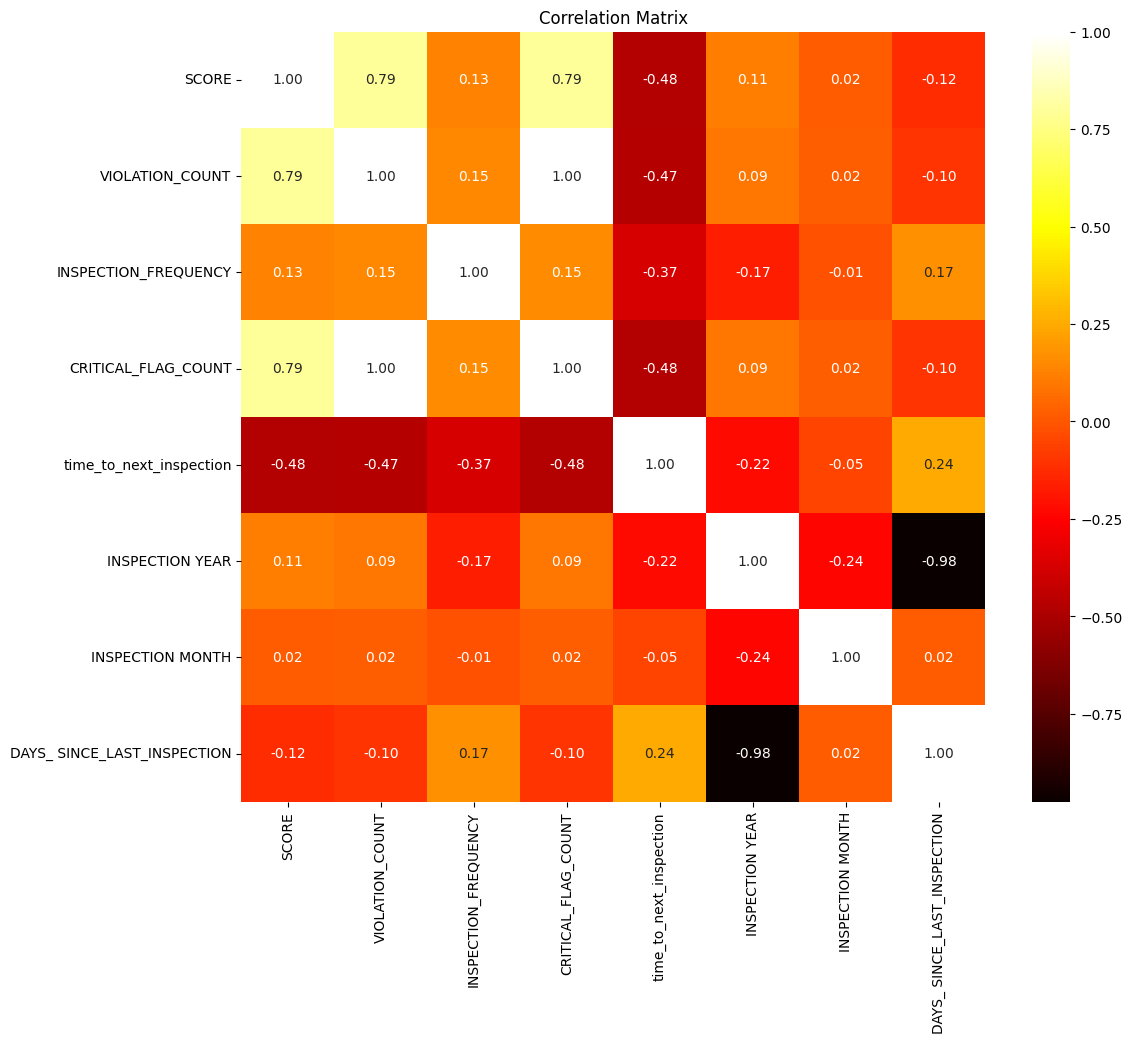

In [55]:
#CORRELATIOn MATRIX

import matplotlib.pyplot as plt
import numpy as np
# Select only numeric columns excluding 'CAMIS' and 'target'
numeric_df = df.select_dtypes(include=np.number).drop(['CAMIS', 'target'], axis=1)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='hot', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [56]:
!pip install plotly
import plotly.express as px

# Count the frequency of violation codes based on VIOLATION CODE
violation_counts = df['VIOLATION CODE'].value_counts().nlargest(20)

# Create a DataFrame for Plotly
df_plotly = pd.DataFrame({
    'VIOLATION CODE': violation_counts.index,
    'Frequency': violation_counts.values
})

# Merge with violation descriptions for hover data
df_plotly = df_plotly.merge(df[['VIOLATION CODE', 'VIOLATION DESCRIPTION']].drop_duplicates(), on='VIOLATION CODE', how='left')

# Create a histogram using Plotly
fig = px.histogram(
    df_plotly,
    x='VIOLATION CODE',
    y='Frequency',
    title="Top 20 Violation Codes",
    hover_data=['VIOLATION DESCRIPTION'],  # Include 'VIOLATION DESCRIPTION' in hover_data
)

# Customize the hover template
fig.update_traces(hovertemplate="Violation Code: %{x}<br>Frequency: %{y}<br>Description: %{customdata[0]}")

fig.show()

In [57]:
df_plotly.to_csv('violation_codes.csv', index=False)

In [58]:
#downloaded the data as excek file for violation codes
!pip install openpyxl
import openpyxl
import os

df_plotly.to_excel('violation_codes.xlsx', index=False)

# Get the current working directory
current_directory = os.getcwd()

# Print the full path to the saved file
file_path = os.path.join(current_directory, 'violation_codes.xlsx')
print(f"File saved to: {file_path}")

# Check if the file exists
if os.path.exists(file_path):
  print("File downloaded successfully!")
else:
  print("File download failed.")

File saved to: /content/violation_codes.xlsx
File downloaded successfully!


POWER BI DASHBOARDS

In [211]:
# Power BI visualization Embed

from IPython.display import IFrame

# Replace with the actual URL of your Power BI visualization
power_bi_url = "https://app.powerbi.com/view?r=eyJrIjoiZjFjN2ZlNmQtNTczYS00MzUwLTk4NjItNjA5NjhjOTQ2MGNlIiwidCI6IjcwZGUxOTkyLTA3YzYtNDgwZi1hMzE4LWExYWZjYmEwMzk4MyIsImMiOjN9"

# Create an IFrame to embed the Power BI visualization
IFrame(power_bi_url, width=800, height=600)


In [59]:
#Restaurants with most number of violation counts

import pandas as pd
# Count the frequency of violation codes based on VIOLATION CODE
violation_counts_per_restaurant = df['Restaurant'].value_counts().nlargest(20)

# Create a DataFrame for Plotly
df_plotly_restaurant = pd.DataFrame({
    'Restaurant': violation_counts_per_restaurant.index,
    'Total Violations': violation_counts_per_restaurant.values
})

# Create a histogram using Plotly
fig = px.histogram(
    df_plotly_restaurant,
    x='Restaurant',
    y='Total Violations',
    title="Top 20 Restaurants with Most Violations",
)

fig.show()


# TRAINING DATA WITH MACHINE LEARNING MODELS



In [60]:
df=df.drop(['VIOLATION CODE', 'VIOLATION DESCRIPTION', 'next_inspection','time_to_next_inspection' ], axis=1).reset_index()

In [61]:
df.drop('index', axis=1, inplace=True)

**PREPARING THE TEST DATA TO PREDICT**

In [62]:
data =df
df_sorted = data.sort_values(by=['CAMIS', 'INSPECTION DATE'], ascending=[True, False])

# Drop duplicates, keeping the first (most recent) inspection for each restaurant (CAMIS)
df_most_recent = df_sorted.drop_duplicates(subset='CAMIS', keep='first')

# Display the resulting dataframe with the most recent inspection for each restaurant
test_data_mr=df_most_recent
df_remaining = df_sorted.loc[~df_sorted.index.isin(df_most_recent.index)]
train_data_mr=df_remaining

In [63]:
df_most_recent.shape #droped the CAMIS duplicates with one row per inspection date

(26522, 24)

In [64]:
test_data_mr.shape #resulting df with most recent inspection data for each restaurant

(26522, 24)

In [65]:
test_data_mr=df_most_recent

In [66]:
train_data_mr.shape

(44677, 24)

**DECISION TREE MODELLING**

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# from sklearn.impute import SimpleImputer

# # X= df[['CAMIS', 'INSPECTION DATE',
# #        'VIOLATION CODE', 'SCORE', 'GRADE',
# #        'next_inspection', 'time_to_next_inspection', 'INSPECTION YEAR', 'INSPECTION MONTH', 'DAYS_ SINCE_LAST_INSPECTION',
# #        'VIOLATION_COUNT', 'INSPECTION_FREQUENCY', 'CRITICAL_FLAG_COUNT']]

# X = df[['CAMIS',
#         'SCORE',
#         'time_to_next_inspection', 'INSPECTION YEAR', 'INSPECTION MONTH', 'DAYS_ SINCE_LAST_INSPECTION',
#        'VIOLATION_COUNT', 'INSPECTION_FREQUENCY', 'CRITICAL_FLAG_COUNT', 'Borough', 'CUISINE DESCRIPTION','ACTION', 'VIOLATION DESCRIPTION', 'INSPECTION TYPE']] # Fixed typo in 'CUISINE DESCRIPTION'


# X=pd.get_dummies(X, columns=['Borough', 'CUISINE DESCRIPTION','ACTION', 'VIOLATION DESCRIPTION', 'INSPECTION TYPE'], drop_first=True)

# y= df['target']

# imputer = SimpleImputer(strategy='most_frequent') # Use 'most_frequent' for categorical features
# X = imputer.fit_transform(X)
# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # List of models to compare
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Random Forest': RandomForestClassifier(),
#     'Decision Tree': DecisionTreeClassifier()
# }

# # Train each model and evaluate
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC
#     y_pred_custom = (y_proba >= 0.75).astype(int)

#     accuracy = accuracy_score(y_test, y_pred_custom)
#     f1 = f1_score(y_test, y_pred_custom)
#     roc_auc = roc_auc_score(y_test, y_proba)

#     print(f'{name}:')
#     print(f' - Accuracy: {accuracy:.2f}')
#     print(f' - F1 Score: {f1:.2f}')
#     print(f' - ROC-AUC: {roc_auc:.2f}')
#     print('---------------------------------')

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Example DataFrame `df` containing the features you mentioned
# df = pd.read_csv('your_dataset.csv')

# Step 1: Feature Engineering - create 'DAYS_SINCE_LAST_INSPECTION' from 'INSPECTION DATE'
# df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
# df['GRADE DATE'] = pd.to_datetime(df['GRADE DATE'])
# df['DAYS_SINCE_LAST_INSPECTION'] = (df['INSPECTION DATE'].max() - df['INSPECTION DATE']).dt.days

# Step 2: Select the relevant features
features = ['CAMIS','Restaurant','SCORE','VIOLATION_COUNT', 'CRITICAL_FLAG_COUNT', 'DAYS_ SINCE_LAST_INSPECTION', 'CUISINE DESCRIPTION', 'ACTION', 'INSPECTION TYPE','Community Board', 'Council District', 'Census Tract','BIN', 'BBL','INSPECTION_FREQUENCY']
X = train_data_mr[features]
y = train_data_mr['target']  # Assuming 'target' is the binary column indicating high likelihood of inspection
X.replace('NA', np.nan, inplace=True)
# Step 3: Define categorical, text, and numeric features
categorical_features = ['INSPECTION TYPE','Restaurant','CAMIS','Community Board', 'Council District', 'Census Tract','BIN', 'BBL']
text_features = ['ACTION','CUISINE DESCRIPTION']
numeric_features = ['SCORE','VIOLATION_COUNT','DAYS_ SINCE_LAST_INSPECTION','CRITICAL_FLAG_COUNT','INSPECTION_FREQUENCY']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# 4.2 Text vectorization using TfidfVectorizer
text_transformer = TfidfVectorizer(max_features=1000)  # You can tune max_features

# 4.3 Standardize numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Changed strategy to 'constant' and set fill_value to 0
    ('scaler', StandardScaler())])

# Step 5: Combine all transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text_ad', TfidfVectorizer(max_features=100), 'ACTION'),
        ('text_cd', TfidfVectorizer(max_features=100), 'CUISINE DESCRIPTION')
    ])

# Step 6: Build the pipeline with a Decision Tree Classifier
# Setting hyperparameters manually without grid search
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5, class_weight='balanced'))
])

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Impute missing values in text columns with an empty string
X_train['ACTION'] = X_train['ACTION'].fillna('')
X_train['CUISINE DESCRIPTION'] = X_train['CUISINE DESCRIPTION'].fillna('')

# Impute missing values in text columns with an empty string
X_test['ACTION'] = X_test['ACTION'].fillna('')
X_test['CUISINE DESCRIPTION'] = X_test['CUISINE DESCRIPTION'].fillna('')
for feature in numeric_features:
    X_train[feature] = X_train[feature].fillna(0)
    X_test[feature] = X_test[feature].fillna(0)
# Step 8: Train the model

# sample_weights = np.where(X['VIOLATION_COUNT'] > threshold_value, 2, 1)
model.fit(X_train, y_train)

# Step 9: Evaluate the model
y_pred = model.predict(X_test)
# y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC
# y_pred_custom = (y_proba >= 0.75).astype(int)

y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC
y_pred_custom = (y_proba >= 0.75).astype(int)

accuracy = accuracy_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)
roc_auc = roc_auc_score(y_test, y_proba)

# print(f'{name}:')
# print(f' - Accuracy: {accuracy:.2f}')
# print(f' - F1 Score: {f1:.2f}')
# print(f' - ROC-AUC: {roc_auc:.2f}')
print('---------------------------------')
f1 = f1_score(y_test, y_pred)

# print(f'F1 Score: {f1}')

<ipython-input-71-1342f2fc476b>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



---------------------------------


In [72]:
print(f' - Accuracy: {accuracy:.2f}')
print(f' - F1 Score: {f1:.2f}')
print(f' - ROC-AUC: {roc_auc:.2f}')

 - Accuracy: 0.84
 - F1 Score: 0.75
 - ROC-AUC: 0.90


In [73]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_custom)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6085
           1       0.79      0.67      0.73      2851

    accuracy                           0.84      8936
   macro avg       0.82      0.79      0.81      8936
weighted avg       0.84      0.84      0.83      8936



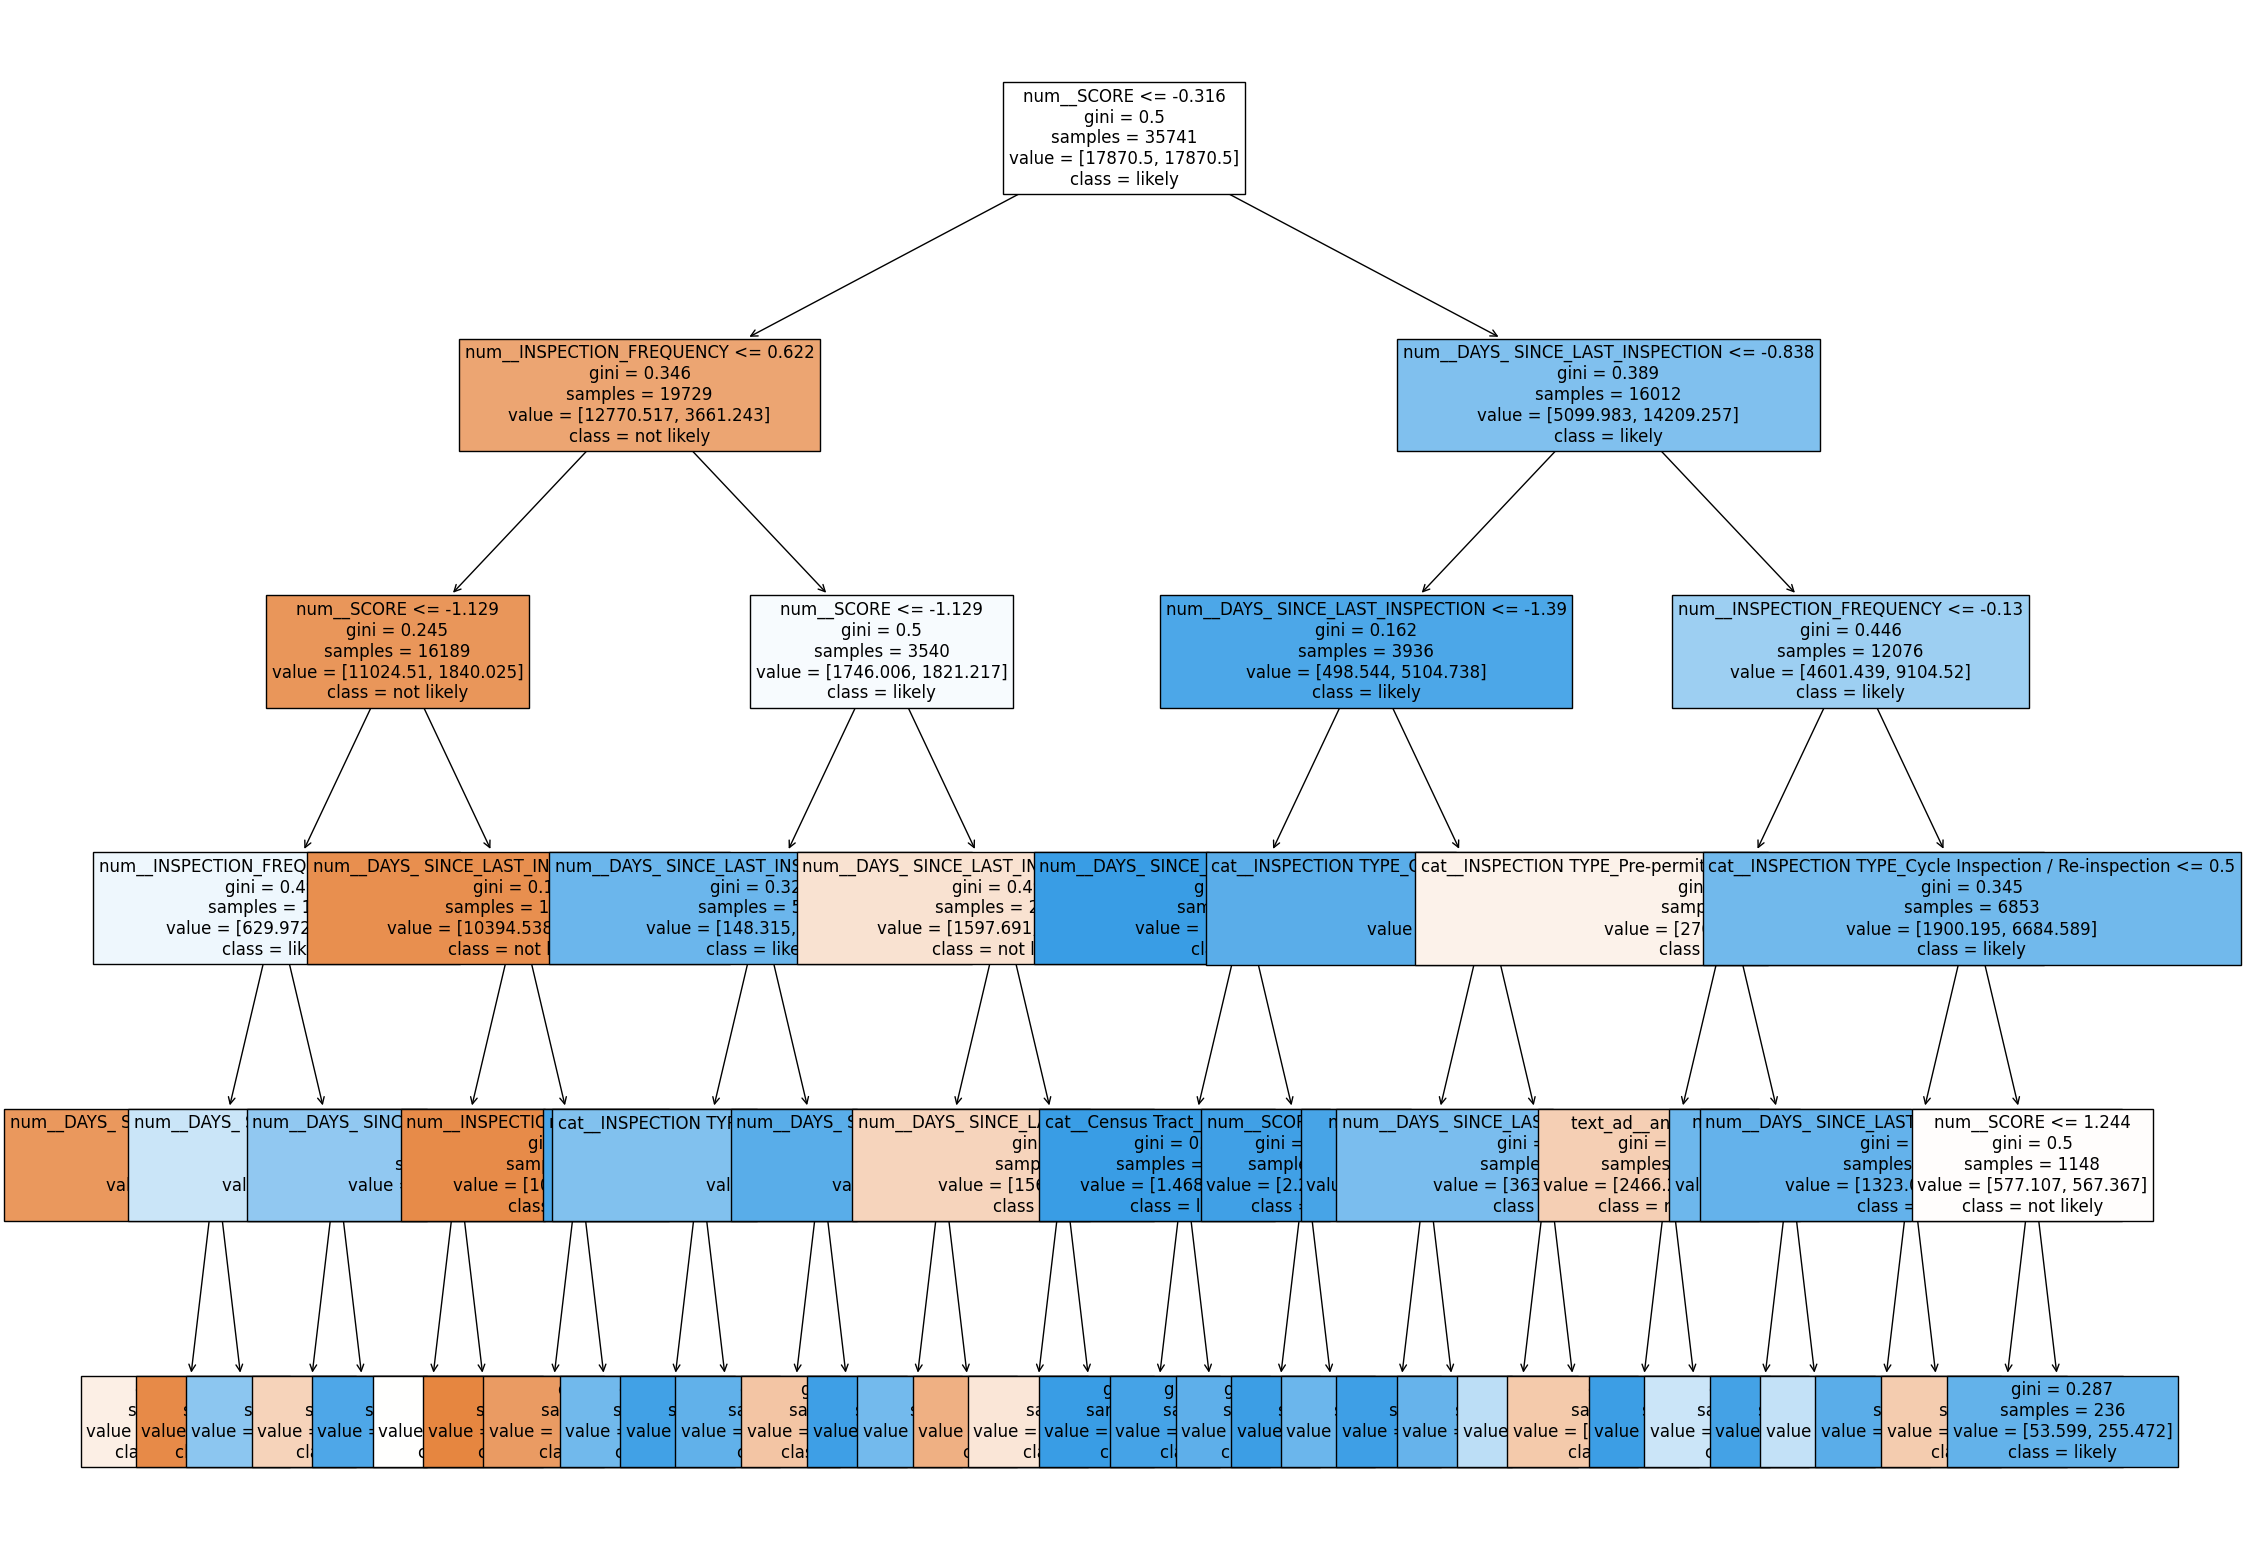

In [74]:
# Get feature names from the ColumnTransformer
from sklearn import tree

# Get feature names from the ColumnTransformer
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

fig = plt.figure(figsize=(25,20))
# Access the decision tree classifier from the pipeline using `named_steps`
_ = tree.plot_tree(model.named_steps['classifier'],
                   feature_names=feature_names,  # Use transformed feature names
                   class_names={0:'not likely', 1:'likely'},
                   filled=True,
                   fontsize=12)

In [75]:
feature_importances = model.named_steps['classifier'].feature_importances_

In [76]:
feature_importances

array([6.12650685e-01, 3.38437015e-04, 1.42225251e-01, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

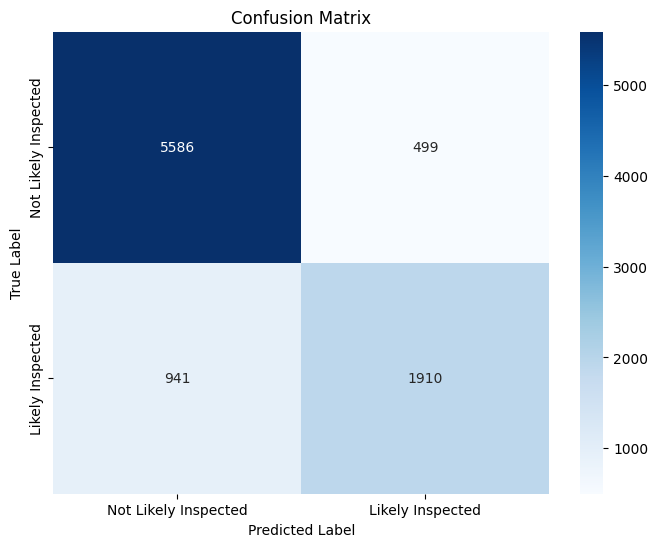

In [77]:
cm = confusion_matrix(y_test, y_pred_custom)

# Display the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Likely Inspected', 'Likely Inspected'], yticklabels=['Not Likely Inspected', 'Likely Inspected'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [78]:
test_data_mr=test_data_mr[features]
# Step 5: Make predictions on the new test data
y_new_pred = model.predict(test_data_mr)

# If you want probabilities and to apply a custom threshold (like 0.75 for high likelihood)
y_new_proba = model.predict_proba(test_data_mr)[:, 1]
y_new_pred_custom = (y_new_proba >= 0.75).astype(int)

In [79]:
y_new_proba = model.predict_proba(test_data_mr)[:, 1]
high_likelihood = test_data_mr[y_new_proba >= 0.75]

In [89]:
high_likelihood


,CAMIS,Restaurant,SCORE,VIOLATION_COUNT,CRITICAL_FLAG_COUNT,DAYS_ SINCE_LAST_INSPECTION,CUISINE DESCRIPTION,ACTION,INSPECTION TYPE,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION_FREQUENCY
8,30112340,WENDY'S,19.0,4,4,44,Hamburgers,Violations were cited in the following area(s).,Cycle Inspection / Re-inspection,309.0,40.0,32700.0,3029737.0,3011970017.0,4
18,40356483,WILKEN'S FINE FOOD,27.0,5,5,150,Sandwiches,Violations were cited in the following area(s).,Cycle Inspection / Re-inspection,318.0,46.0,70000.0,3237693.0,3084310041.0,6
21,40356731,TASTE THE TROPICS ICE CREAM,12.0,3,3,165,Frozen Desserts,Violations were cited in the following area(s).,Cycle Inspection / Initial Inspection,317.0,45.0,82800.0,3112318.0,3049640001.0,3
23,40357217,WILD ASIA,12.0,2,2,122,American,Violations were cited in the following area(s).,Cycle Inspection / Initial Inspection,227.0,15.0,33400.0,2116700.0,2031200020.0,2
28,40359705,NATHAN'S FAMOUS,51.0,8,8,58,Hotdogs,Violations were cited in the following area(s).,Cycle Inspection / Initial Inspection,313.0,47.0,35200.0,3189660.0,3070740340.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71194,50157604,TAKE SUSHI & BOWL,74.0,10,10,17,Asian/Asian Fusion,Violations were cited in the following area(s).,Administrative Miscellaneous / Initial Inspection,108.0,4.0,11000.0,1078347.0,1014150021.0,1
71195,50157669,RE LA GUN TANG,72.0,12,12,17,Chinese,Violations were cited in the following area(s).,Pre-permit (Operational) / Initial Inspection,307.0,43.0,10600.0,3014439.0,3008180041.0,1
71196,50157674,MAMIE'S YOGURT,30.0,2,2,24,Frozen Desserts,Violations were cited in the following area(s).,Pre-permit (Non-operational) / Initial Inspection,407.0,20.0,87100.0,4597144.0,4049727505.0,1
71197,50158108,QIAO XLB,13.0,3,3,23,Other,Violations were cited in the following area(s).,Pre-permit (Operational) / Initial Inspection,407.0,19.0,92500.0,4000000.0,4041640029.0,1


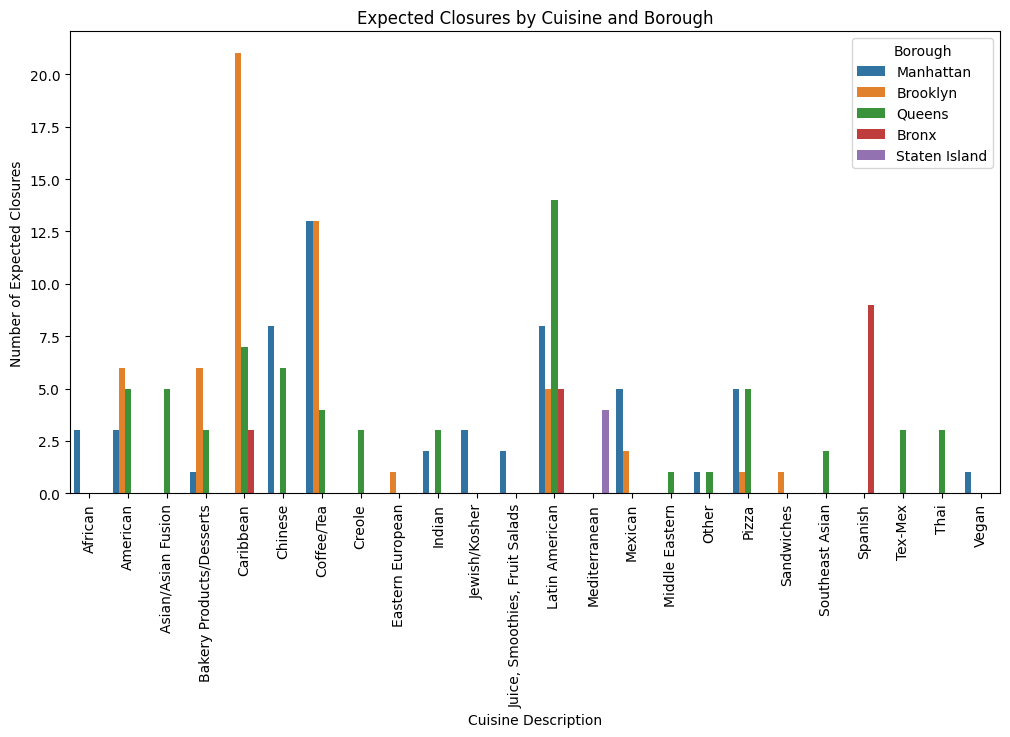

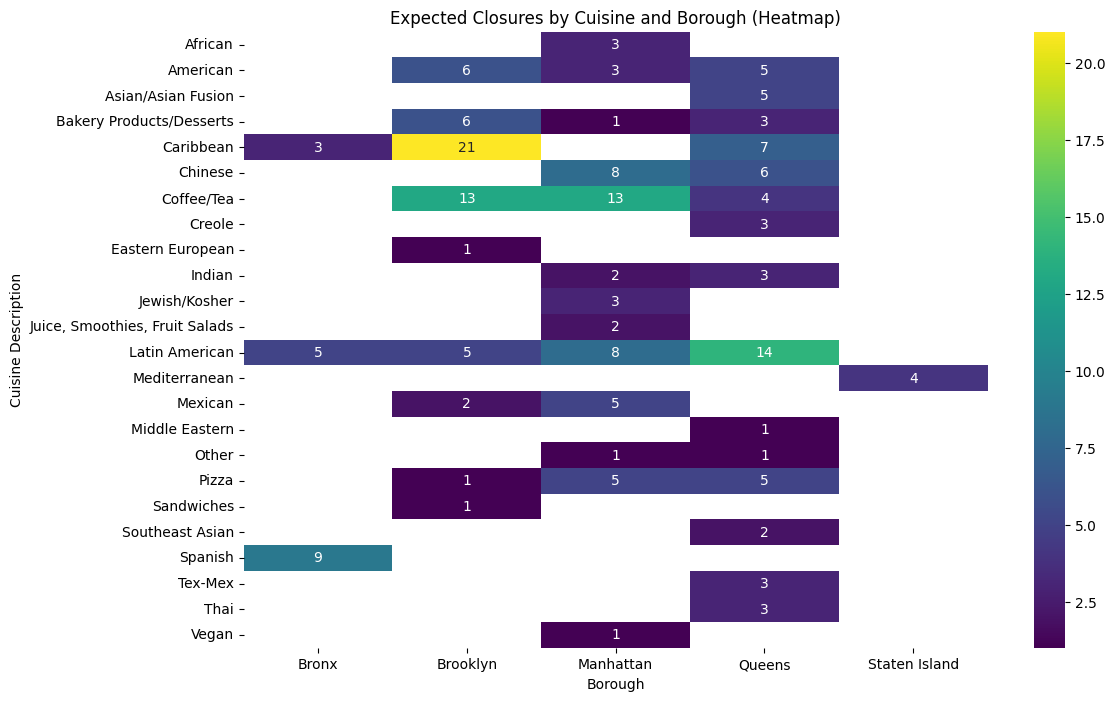

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'high_likelihood' DataFrame contains the restaurants highly likely to be inspected
# and 'df' contains the original dataset with 'CUISINE DESCRIPTION' and 'Borough'

# Merge the 'high_likelihood' DataFrame with the original DataFrame to get cuisine and borough information
merged_df = pd.merge(high_likelihood, df[['CAMIS', 'CUISINE DESCRIPTION', 'Borough', 'ACTION']], on='CAMIS', how='left')

# Group by 'CUISINE DESCRIPTION' and 'Borough' and count the number of closures (ACTION = 'Closed')
# Merge the 'high_likelihood' DataFrame with the original DataFrame to get cuisine and borough information
# Merge the 'high_likelihood' DataFrame with the original DataFrame to get cuisine and borough information
# merged_df = pd.merge(high_likelihood, df[['CAMIS', 'CUISINE DESCRIPTION', 'Borough', 'ACTION']], on='CAMIS', how='left')

# Group by 'CUISINE DESCRIPTION' and 'Borough' and count the number of closures (ACTION = 'Closed')
closure_counts = merged_df[merged_df['ACTION_x'].str.contains('closed', case=False, na=False)].groupby(['CUISINE DESCRIPTION_x', 'Borough'])['CAMIS'].count().reset_index(name='Closure Count')
# Visualize the closure counts using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='CUISINE DESCRIPTION_x', y='Closure Count', hue='Borough', data=closure_counts)
plt.xticks(rotation=90)
plt.title('Expected Closures by Cuisine and Borough')
plt.xlabel('Cuisine Description')
plt.ylabel('Number of Expected Closures')
plt.show()


closure_pivot = closure_counts.pivot(index='CUISINE DESCRIPTION_x', columns='Borough', values='Closure Count')
plt.figure(figsize=(12, 8))
sns.heatmap(closure_pivot, annot=True, cmap='viridis', fmt='.0f')
plt.title('Expected Closures by Cuisine and Borough (Heatmap)')
plt.xlabel('Borough')
plt.ylabel('Cuisine Description')
plt.show()

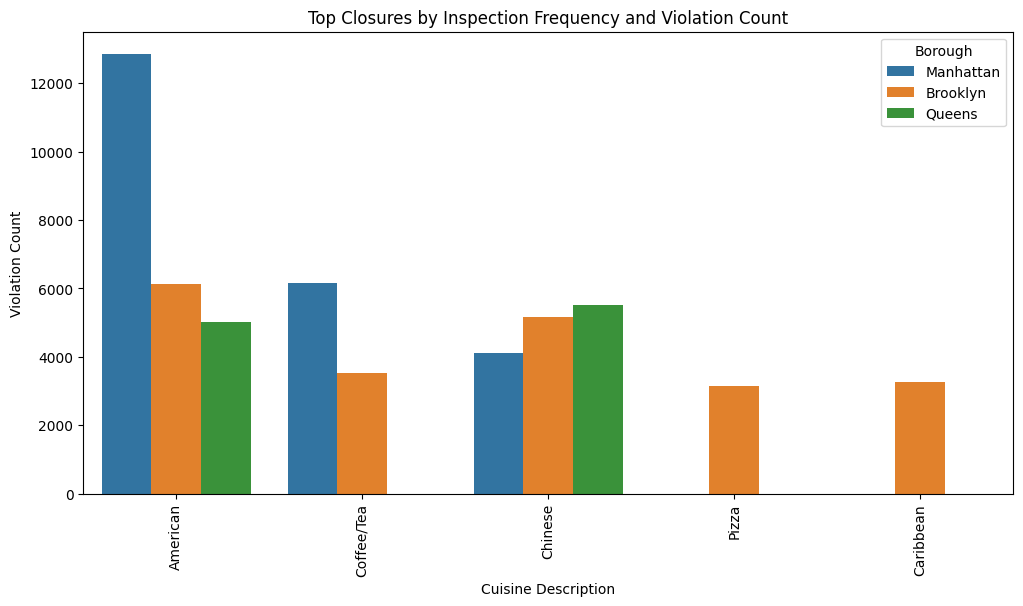

In [83]:
#  Group by 'CUISINE DESCRIPTION' and 'Borough' and calculate the sum of 'Inspection Frequency' and 'Violation Count'
merged_df = pd.merge(high_likelihood, df[['CAMIS', 'CUISINE DESCRIPTION', 'Borough', 'ACTION']], on='CAMIS', how='left')

grouped_df = merged_df.groupby(['CUISINE DESCRIPTION_x', 'Borough'])[['INSPECTION_FREQUENCY', 'VIOLATION_COUNT']].sum().reset_index()

# Sort the DataFrame by 'Inspection Frequency' and 'Violation Count' in descending order
sorted_df = grouped_df.sort_values(['INSPECTION_FREQUENCY', 'VIOLATION_COUNT'], ascending=[False, False])

# Get the top closures (e.g., top 10)
top_closures = sorted_df.head(10)

# Visualize the top closures using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='CUISINE DESCRIPTION_x', y='VIOLATION_COUNT', hue='Borough', data=top_closures)
plt.xticks(rotation=90)
plt.title('Top Closures by Inspection Frequency and Violation Count')
plt.xlabel('Cuisine Description')
plt.ylabel('Violation Count')
plt.show()

In [237]:
merged_df = pd.merge(high_likelihood, df[['CAMIS', 'CUISINE DESCRIPTION', 'Borough', 'ACTION']], on='CAMIS', how='left')